In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
pd.__version__

'0.16.2'

In [2]:
# http://pbpython.com/simple-graphing-pandas.html
# http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

In [3]:
%matplotlib inline

In [4]:
# import the data
file_name = 'data/panera-data-zach.txt'
raw = pd.read_table(file_name, index_col = 0, parse_dates = ['date'])
raw.head()

,food_item,count,date
index,,,
1,onion,8,2015-06-18 20:35:54
2,tomato,5,2015-09-20 12:37:03
3,tomato,2,2015-08-09 18:31:22
4,onion,2,2015-10-10 18:35:24
5,tomato,1,2015-07-25 12:55:21


In [5]:
raw.dtypes

food_item            object
count                 int64
date         datetime64[ns]
dtype: object

In [6]:
# exract hours data for grouping
# http://stackoverflow.com/a/32366268/1927178
hours = pd.DatetimeIndex(raw['date']).hour

In [7]:
# add in hour data to new DataFrame
df = raw
df['hour'] = hours
df.head()

,food_item,count,date,hour
index,,,,
1,onion,8,2015-06-18 20:35:54,20
2,tomato,5,2015-09-20 12:37:03,12
3,tomato,2,2015-08-09 18:31:22,18
4,onion,2,2015-10-10 18:35:24,18
5,tomato,1,2015-07-25 12:55:21,12


In [8]:
# group the data
df_group = df.groupby(['hour', 'food_item'])
df_group.sum().unstack()

count                 
food_item onion pineapple tomato
hour                            
6           NaN        45     17
7           NaN        48     26
8             3        88     15
9           NaN        64     34
10           20        40     32
11           22        14     39
12           72         8     57
13          176         4     57
14          165         1     87
15          221       NaN     75
16          327       NaN     63
17          347       NaN     60
18          364       NaN     69
19          240       NaN     84
20          205       NaN     31
21          205       NaN     46

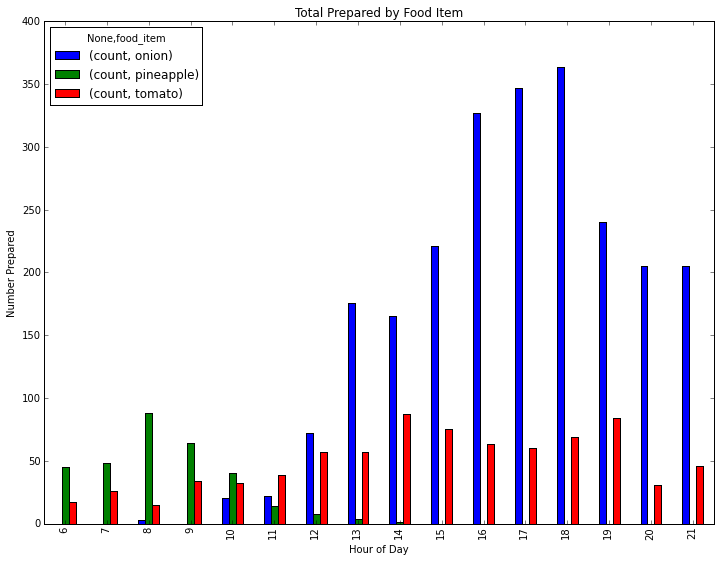

In [9]:
sum_plot = df_group.sum().unstack().plot(kind = 'bar', 
                                        stacked = False, 
                                        title = "Total Prepared by Food Item",
                                        figsize = (12, 9))
sum_plot.set_xlabel("Hour of Day")
sum_plot.set_ylabel("Number Prepared")

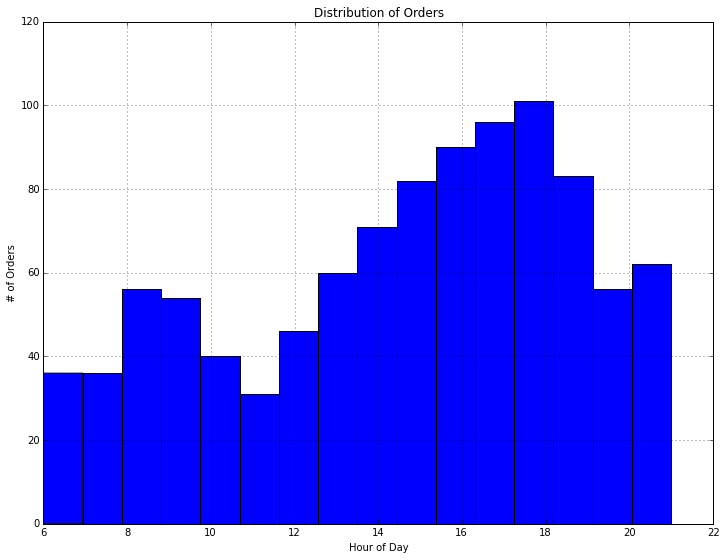

In [10]:
orders = df[['food_item', 'hour']]
order_plot = orders['hour'].hist(bins = 16,
                                 figsize = (12, 9))
order_plot.set_title("Distribution of Orders")
order_plot.set_xlabel("Hour of Day")
order_plot.set_ylabel("# of Orders")